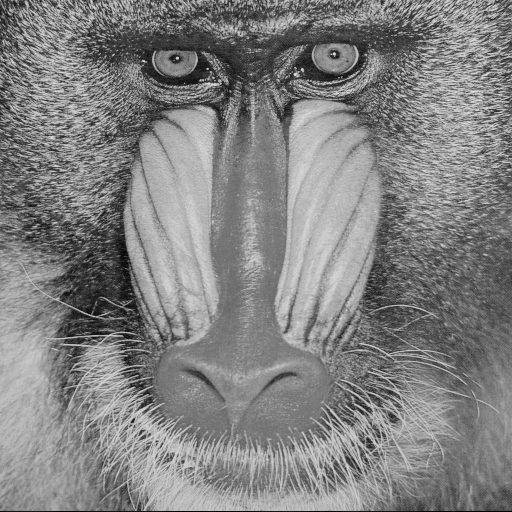

In [2]:
import TestImages: testimage
import ImageView: imshow
import Images: Gray
img = testimage("mandrill")
im0 = 1*Gray.(img)

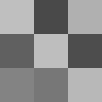

In [3]:
import ImageTransformations: imresize
im3 = imresize(im0, 3, 3)

In [34]:
m_im3 = convert(Matrix{Float32}, im3)

3×3 Matrix{Float32}:
 0.749673  0.286601  0.689869
 0.378105  0.743137  0.302288
 0.515142  0.466993  0.72146

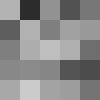

In [5]:
im5 = imresize(im0, 5, 5)

In [6]:
convert(Matrix{Float64}, im5)

5×5 Matrix{Float64}:
 0.703137  0.172706  0.571961  0.320275  0.464745
 0.36851   0.698627  0.497647  0.627294  0.601216
 0.498824  0.679608  0.743137  0.686863  0.430392
 0.532706  0.546392  0.524118  0.32902   0.298157
 0.658118  0.797176  0.637843  0.615882  0.455529

In [7]:
import LinearAlgebra: transpose

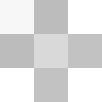

In [8]:
p_im3 = transpose(im3)*im3

In [12]:
convert(Matrix{Float64}, p_im3)

3×3 Matrix{Float64}:
 0.970344  0.736409  1.00313
 0.736409  0.852476  0.759276
 1.00313   0.759276  1.0878

In [13]:
transpose(convert(Matrix{Float64}, im3))*convert(Matrix{Float64}, im3)

3×3 Matrix{Float64}:
 0.970344  0.736409  1.00313
 0.736409  0.852476  0.759276
 1.00313   0.759276  1.0878

In [14]:
norm_columns(f, x) = f.(x) ./ (sum(f.(x), dims=1))

norm_columns (generic function with 1 method)

In [15]:
norm_columns(x -> x+1, im3)

3×3 Matrix{Float32}:
 0.376848  0.286119  0.358508
 0.296819  0.387645  0.276282
 0.326334  0.326235  0.36521

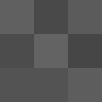

In [18]:
nim3 = Gray.(norm_columns(x -> x+1, im3))

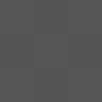

In [19]:
p_nim3 = transpose(nim3)*nim3

In [20]:
# scale image so that all points brightness are between 0 and 1, and that full range is used
function normalize_image(im)
    im_res = im - minimum(im)
    return (1/maximum(im_res))*im_res
end

normalize_image (generic function with 1 method)

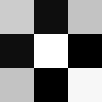

In [27]:
result = normalize_image(p_nim3)

In [22]:
convert(Matrix{Float64},p_nim3)

3×3 Matrix{Float64}:
 0.336609  0.329345  0.336289
 0.329345  0.338563  0.32882
 0.336289  0.32882   0.338238

In [35]:
m_res = convert(Matrix{Float32},normalize_image(p_nim3))

3×3 Matrix{Float32}:
 0.799491   0.0539318  0.76662
 0.0539318  1.0        0.0
 0.76662    0.0        0.966682

In [24]:
using Flux

┌ Warning: This version of CUDA.jl only supports NVIDIA drivers for CUDA 10.1 or higher (yours is for CUDA 9.1.0)
└ @ CUDA C:\Users\Fluid3\.julia\packages\CUDA\M4jkK\src\initialization.jl:100


In [25]:
import LinearAlgebra: norm

In [26]:
loss(x, y) = norm(transpose(x)*x - y)

loss (generic function with 1 method)

In [37]:
m_im3

3×3 Matrix{Float32}:
 0.749673  0.286601  0.689869
 0.378105  0.743137  0.302288
 0.515142  0.466993  0.72146

In [39]:
transpose(m_im3)*m_im3

3×3 Matrix{Float32}:
 0.970344  0.736409  1.00313
 0.736409  0.852476  0.759276
 1.00313   0.759276  1.0878

In [40]:
m_res

3×3 Matrix{Float32}:
 0.799491   0.0539318  0.76662
 0.0539318  1.0        0.0
 0.76662    0.0        0.966682

In [41]:
loss(m_im3, m_res)

1.5040091f0

In [36]:
gradient(()->loss(m_im3, m_res), m_im3)

LoadError: MethodError: no method matching (::var"#17#18")(::Matrix{Float32})
[0mClosest candidates are:
[0m  (::var"#17#18")() at In[36]:1

In [44]:
grads = gradient(()->loss(m_im3, m_res), params(m_im3))

Grads(...)

In [47]:
grads[m_im3]

3×3 Matrix{Float32}:
 0.647392  1.32068   0.636258
 0.855404  0.502572  0.917924
 0.767756  1.10434   0.749721

In [48]:
grads_gray = gradient(()->loss(im3, result), params(im3))

LoadError: Mutating arrays is not supported

In [49]:
# in what on Earth sense these arrays are MUTATING ???

In [50]:
loss(im3, result)

1.5040091f0

In [51]:
typeof(im3)

Matrix{Gray{Float32}} (alias for Array{Gray{Float32}, 2})

In [52]:
typeof(result)

Matrix{Gray{Float32}} (alias for Array{Gray{Float32}, 2})

In [53]:
typeof(m_im3)

Matrix{Float32} (alias for Array{Float32, 2})